In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install --upgrade certifi

!pip install --trusted-host files.pythonhosted.org optuna



In [2]:
os.listdir()

['.ipynb_checkpoints',
 'fraudTest.csv',
 'fraudTrain.csv',
 'Fraudulent transactions-Bkp02Sept2024.ipynb',
 'Fraudulent transactions.ipynb',
 'fraud_detection_nn.pth',
 'fraud_detection_nn_es.pth',
 'LIME_implementation',
 'LIME_implementation.zip',
 'proj2',
 'train_df.csv']

In [3]:
data=pd.read_csv("fraudTrain.csv")

In [4]:
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [5]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [7]:
data.describe(include='object')

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
count,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675
unique,1274791,693,14,352,481,2,983,894,51,494,968,1296675
top,2019-04-22 16:02:01,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,0069 Robin Brooks Apt. 695,Birmingham,TX,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9
freq,4,4403,131659,26669,28794,709863,3123,5617,94876,9779,5636,1


In [8]:
train_df = data.drop(['Unnamed: 0', 'trans_date_trans_time', 'cc_num','first', 'last','trans_num', 'unix_time','merchant'],axis=1)
test_df = pd.read_csv('fraudTest.csv')

In [10]:
train_df['distance']= (train_df['lat'] - train_df['merch_lat'])**2 + (train_df['long'] - train_df['merch_long'])**2

In [11]:
train_df.drop(['merch_lat', 'merch_long','lat', 'long'],axis=1,inplace=True)

In [12]:
from datetime import datetime

# Function to calculate age
def calculate_age(dob):
    today = datetime.today()
    dob = datetime.strptime(dob, '%Y-%m-%d')
    age = today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))
    return age

# Apply the function to the 'dob' column
train_df['age'] = train_df['dob'].apply(calculate_age)


In [13]:
train_df.drop(['dob'],axis=1,inplace=True)

In [14]:
train_df.drop(['street','zip','city_pop'],axis=1,inplace=True)

In [75]:
train_df.columns

Index(['category', 'amt', 'gender', 'city', 'state', 'job', 'is_fraud',
       'distance', 'age'],
      dtype='object')

In [76]:
categorical_columns = ['category', 'gender', 'job','city','state']
for column in categorical_columns:
    train_df[column] = train_df[column].astype('category')

In [77]:
train_df.to_csv("train_df.csv")

In [78]:
train_df=pd.read_csv("train_df.csv")
train_df.drop('Unnamed: 0',axis=1,inplace=True)

In [79]:
train_df.dtypes

category     object
amt         float64
gender       object
city         object
state        object
job          object
is_fraud      int64
distance    float64
age           int64
dtype: object

In [80]:
# Convert all object columns to category
train_df = train_df.apply(lambda col: col.astype('category') if col.dtype == 'object' else col)


In [81]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt


X = train_df.drop(['is_fraud'], axis=1)
y = train_df['is_fraud']


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.81      0.65      0.72      1520

    accuracy                           1.00    259335
   macro avg       0.90      0.83      0.86    259335
weighted avg       1.00      1.00      1.00    259335

confusion_matrix 
 [[257582    233]
 [   530    990]]


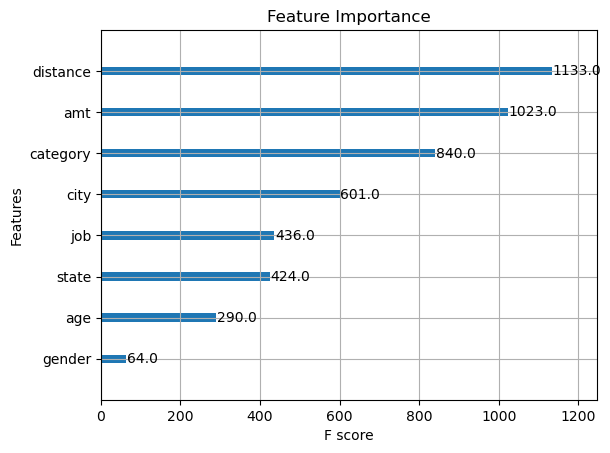

In [82]:
#scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

# Initialize and train the XGBoost model
model = xgb.XGBClassifier(random_state=42,enable_categorical=True)#,scale_pos_weight=scale_pos_weight)
model.fit(X_train, y_train)


y_val_pred = model.predict(X_val)


print(f"classification report \n {classification_report(y_val, y_val_pred)}")
print(f"confusion_matrix \n {confusion_matrix(y_val, y_val_pred)}")

xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()


In [83]:
 y_train.value_counts()

is_fraud
0    1031354
1       5986
Name: count, dtype: int64

[0]	validation_0-auc:0.97365
[1]	validation_0-auc:0.97962
[2]	validation_0-auc:0.98000
[3]	validation_0-auc:0.98307
[4]	validation_0-auc:0.98576
[5]	validation_0-auc:0.98815
[6]	validation_0-auc:0.98819
[7]	validation_0-auc:0.98702
[8]	validation_0-auc:0.98755
[9]	validation_0-auc:0.98708
[10]	validation_0-auc:0.98710
classification report 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99    257815
           1       0.16      0.92      0.27      1520

    accuracy                           0.97    259335
   macro avg       0.58      0.95      0.63    259335
weighted avg       0.99      0.97      0.98    259335

confusion_matrix 
 [[250407   7408]
 [   123   1397]]


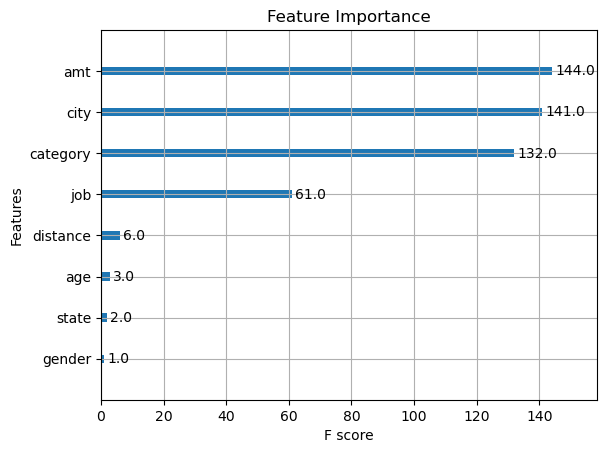

In [84]:
scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1])

model = xgb.XGBClassifier(early_stopping_rounds =5 ,eval_metric='auc', random_state=42,enable_categorical=True,scale_pos_weight=scale_pos_weight)
model.fit(X_train, y_train,eval_set=[(X_val, y_val)])

y_val_pred = model.predict(X_val)


print(f"classification report \n {classification_report(y_val, y_val_pred)}")
print(f"confusion_matrix \n {confusion_matrix(y_val, y_val_pred)}")

xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()


##### Use stacking

In [85]:
import lightgbm as lgbm
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

base_learners = [
    ('lgbm',lgbm.LGBMClassifier(random_state=42)),
    ('xgb', xgb.XGBClassifier(random_state=42, enable_categorical=True))
]


In [86]:
meta_learner = LogisticRegression()

stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

stacking_model.fit(X_train, y_train)


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 5986, number of negative: 1031354
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1918
[LightGBM] [Info] Number of data points in the train set: 1037340, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005771 -> initscore=-5.149204
[LightGBM] [Info] Start training from score -5.149204
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large 

StackingClassifier(estimators=[('lgbm', LGBMClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=True,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression())

In [87]:
#model = xgb.XGBClassifier(early_stopping_rounds=10, eval_metric='auc',enable_categorical=True)
#model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=True)

# Make predictions on the validation set
y_val_pred = stacking_model.predict(X_val)

print(f"classification report \n {classification_report(y_val, y_val_pred)}")
print(f"confusion_matrix \n {confusion_matrix(y_val, y_val_pred)}")


classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.85      0.61      0.71      1520

    accuracy                           1.00    259335
   macro avg       0.92      0.81      0.85    259335
weighted avg       1.00      1.00      1.00    259335

confusion_matrix 
 [[257650    165]
 [   591    929]]


In [88]:
#xgb.plot_tree(model, num_trees=0)
plt.show()

#### Neural nets approach

In [89]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split 

In [90]:
train_df = pd.get_dummies(train_df,drop_first=True)


In [91]:
train_df

,amt,is_fraud,distance,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,...,job_Visual merchandiser,job_Volunteer coordinator,job_Warden/ranger,job_Warehouse manager,job_Waste management officer,job_Water engineer,job_Water quality scientist,job_Web designer,job_Wellsite geologist,job_Writer
0,4.97,0,0.761831,36,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,107.23,0,0.074153,46,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,220.11,0,0.952274,62,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,45.00,0,0.846035,57,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,41.96,0,0.754300,38,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,15.56,0,1.387053,62,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1296671,51.70,0,0.671796,44,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1296672,105.93,0,0.936136,57,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1296673,74.90,0,0.807797,44,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [92]:
scaler = StandardScaler()
numerical_columns = ['amt', 'age','distance']
train_df[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])
#test_df[numerical_columns] = scaler.transform(test_df[numerical_columns])


In [93]:
train_df=train_df.apply(lambda x: x.astype(int) if x.dtype == bool else x)

In [94]:
X_train, X_val, y_train, y_val = train_test_split(train_df.drop('is_fraud', axis=1), train_df['is_fraud'], test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

# Calculate class weights
class_counts = y_train.value_counts()
class_weights = 1. / class_counts

class_weights_normalized = class_weights / class_weights.min()
print(f"Normalized class weights: {class_weights_normalized}")

sample_weights = y_train.map(class_weights_normalized)
print(sample_weights)
sample_weights = torch.tensor(sample_weights.values, dtype=torch.float32)
train_sampler = torch.utils.data.WeightedRandomSampler(sample_weights, len(sample_weights))

# Update DataLoader
train_loader = DataLoader(train_dataset, batch_size=64  , sampler=train_sampler)

#train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)


Normalized class weights: is_fraud
0      1.000000
1    172.294353
Name: count, dtype: float64
330201     1.0
798518     1.0
1260375    1.0
412511     1.0
344644     1.0
          ... 
110268     1.0
259178     1.0
131932     1.0
671155     1.0
121958     1.0
Name: is_fraud, Length: 1037340, dtype: float64


In [95]:
import math
class WeightedBCELoss(nn.Module):
    def __init__(self, pos_weight):
        super(WeightedBCELoss, self).__init__()
        self.pos_weight = max(pos_weight,1)#-math.inf)

    def forward(self, inputs, targets):
        loss = nn.functional.binary_cross_entropy_with_logits(inputs, targets, pos_weight=self.pos_weight)
        return loss

pos_weight = torch.tensor([len(y_train[y_train == 0]) / len(y_train[y_train == 1])])
print(f"pos weight :{pos_weight}")

pos weight :tensor([172.2944])


In [96]:
def calculate_accuracy(loader):
    model.eval()   

    correct = 0  # the number of correct predictions.
    total = 0  # the total number of predictions.

    with torch.no_grad():  
        for inputs, targets in loader:  
           # inputs, targets = inputs.to(device), targets.to(device)  

            outputs = model(inputs) 

            _, predicted = torch.max(outputs.data, 1)  

            total += targets.size(0)  
            # Calculate the number of correct predictions in the batch by comparing predicted with targets, summing the true predictions, and adding this sum to the correct counter.
            correct += (predicted == targets).sum().item()  

    return 100 * correct / total  

In [97]:
class FraudDetectionNN(nn.Module):
    def __init__(self):
        super(FraudDetectionNN, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(64, 1)
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        #x = torch.sigmoid(self.fc3(x))
        x = self.fc3(x)   # using bweighted BCE with logits 
        return x


model = FraudDetectionNN()
#criterion = nn.BCELoss()
criterion = WeightedBCELoss(pos_weight=pos_weight)
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 20
for epoch in range(num_epochs):
    y_train_pred = []
    y_val_pred=[]
    model.train()
    train_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * X_batch.size(0)
        y_train_pred.extend(outputs.detach().numpy())

    y_train_pred = np.array(y_train_pred)
    y_train_pred = (y_train_pred >= 0.5).astype(int)

    y_train_true = y_train_tensor.numpy()
    
    train_loss /= len(train_loader.dataset)
    
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item() * X_batch.size(0)
            y_val_pred.extend(outputs.detach().numpy())

    y_val_pred = np.array(y_val_pred)
    y_val_pred = (y_val_pred >= 0.5).astype(int)

    y_val_true = y_val_tensor.cpu().numpy()

    val_loss /= len(val_loader.dataset)
    
   #train_accuracy = calculate_accuracy(train_loader)
   #l_accuracy = calculate_accuracy(val_loader)
 
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f} ')#in Accuracy: {train_accuracy:.2f}%, Test Accuracy: {val_accuracy:.2f}%')
    print(f"training \n {classification_report(y_train_true, y_train_pred)}")
    print(confusion_matrix(y_train_true, y_train_pred)) 
    print(f"Validation \n {classification_report(y_val_true, y_val_pred)}")
    print(confusion_matrix(y_val_true, y_val_pred)) 
# Save the trained model
torch.save(model.state_dict(), 'fraud_detection_nn.pth')

print("Model training complete and saved as fraud_detection_nn.pth")

Epoch 1/20, Train Loss: 1.3165, Val Loss: 1.1814 
training 
               precision    recall  f1-score   support

         0.0       0.99      0.28      0.44   1031354
         1.0       0.01      0.72      0.01      5986

    accuracy                           0.29   1037340
   macro avg       0.50      0.50      0.23   1037340
weighted avg       0.99      0.29      0.44   1037340

[[292824 738530]
 [  1670   4316]]
Validation 
               precision    recall  f1-score   support

         0.0       1.00      0.75      0.86    257815
         1.0       0.02      0.96      0.04      1520

    accuracy                           0.75    259335
   macro avg       0.51      0.85      0.45    259335
weighted avg       0.99      0.75      0.85    259335

[[193258  64557]
 [    63   1457]]
Epoch 2/20, Train Loss: 0.7162, Val Loss: 0.8896 
training 
               precision    recall  f1-score   support

         0.0       0.99      0.38      0.55   1031354
         1.0       0.01      0.6

[[429282 602072]
 [  2525   3461]]
Validation 
               precision    recall  f1-score   support

         0.0       1.00      0.91      0.95    257815
         1.0       0.06      0.91      0.11      1520

    accuracy                           0.91    259335
   macro avg       0.53      0.91      0.53    259335
weighted avg       0.99      0.91      0.95    259335

[[234400  23415]
 [   137   1383]]
Epoch 12/20, Train Loss: 0.5491, Val Loss: 0.6507 
training 
               precision    recall  f1-score   support

         0.0       0.99      0.42      0.59   1031354
         1.0       0.01      0.59      0.01      5986

    accuracy                           0.42   1037340
   macro avg       0.50      0.50      0.30   1037340
weighted avg       0.99      0.42      0.58   1037340

[[429159 602195]
 [  2454   3532]]
Validation 
               precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    257815
         1.0       0.07      0.88      0.12 

In [98]:
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0


Model confusion matrix andclassification report

In [100]:
# Initialize the model, loss function, optimizer, and early stopping
model = FraudDetectionNN()
#criterion = nn.BCELoss
criterion = WeightedBCELoss(pos_weight=pos_weight)
optimizer = optim.Adam(model.parameters(), lr=0.001)
early_stopping = EarlyStopping(patience=5, min_delta=0.003)

# Training loop with early stopping
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * X_batch.size(0)
    
    train_loss /= len(train_loader.dataset)
    
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item() * X_batch.size(0)
    
    val_loss /= len(val_loader.dataset)
    
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
    
    # Check early stopping condition
    early_stopping(val_loss)
    if early_stopping.early_stop:
        print("Early stopping")
        break

# Save the trained model
torch.save(model.state_dict(), 'fraud_detection_nn_es.pth')
print("Model training complete and saved as fraud_detection_nn_es.pth")


Epoch 1/20, Train Loss: 1.3707, Val Loss: 1.0454
Epoch 2/20, Train Loss: 0.7341, Val Loss: 0.9645
Epoch 3/20, Train Loss: 0.6357, Val Loss: 0.8091
Epoch 4/20, Train Loss: 0.6009, Val Loss: 0.7213
Epoch 5/20, Train Loss: 0.5738, Val Loss: 0.7852
Epoch 6/20, Train Loss: 0.5744, Val Loss: 0.7089
Epoch 7/20, Train Loss: 0.5654, Val Loss: 0.7669
Epoch 8/20, Train Loss: 0.5624, Val Loss: 0.7209
Epoch 9/20, Train Loss: 0.5617, Val Loss: 0.7295
Epoch 10/20, Train Loss: 0.5606, Val Loss: 0.7949
Epoch 11/20, Train Loss: 0.5639, Val Loss: 0.7328
Early stopping
Model training complete and saved as fraud_detection_nn_es.pth


####### 
Epoch 1/20, Train Loss: 0.0278, Val Loss: 0.0203
Epoch 2/20, Train Loss: 0.0217, Val Loss: 0.0203
Epoch 3/20, Train Loss: 0.0225, Val Loss: 0.0216
Epoch 4/20, Train Loss: 0.0217, Val Loss: 0.0246
Epoch 5/20, Train Loss: 0.0199, Val Loss: 0.0183
Epoch 6/20, Train Loss: 0.0194, Val Loss: 0.0152
Epoch 7/20, Train Loss: 0.0189, Val Loss: 0.0169
Epoch 8/20, Train Loss: 0.0182, Val Loss: 0.0141
Epoch 9/20, Train Loss: 0.0185, Val Loss: 0.0271
Epoch 10/20, Train Loss: 0.0185, Val Loss: 0.0175
Epoch 11/20, Train Loss: 0.0187, Val Loss: 0.0139
Epoch 12/20, Train Loss: 0.0180, Val Loss: 0.0171
Epoch 13/20, Train Loss: 0.0176, Val Loss: 0.0132
Epoch 14/20, Train Loss: 0.0170, Val Loss: 0.0134
Epoch 15/20, Train Loss: 0.0167, Val Loss: 0.0151
Epoch 16/20, Train Loss: 0.0165, Val Loss: 0.0144
Epoch 17/20, Train Loss: 0.0162, Val Loss: 0.0134
Epoch 18/20, Train Loss: 0.0160, Val Loss: 0.0122
Epoch 19/20, Train Loss: 0.0159, Val Loss: 0.0135
Epoch 20/20, Train Loss: 0.0157, Val Loss: 0.0122
Model training complete and saved as fraud_detection_nn.pth

In [101]:
test_df=pd.read_csv('fraudTest.csv')
test_df = test_df.drop(['street','zip','city_pop','Unnamed: 0', 'trans_date_trans_time', 'cc_num','first', 'last','trans_num', 'unix_time','merchant'],axis=1)


In [102]:
test_df['distance']= (test_df['lat'] - test_df['merch_lat'])**2 + (test_df['long'] - test_df['merch_long'])**2

In [103]:
test_df.drop(['merch_lat', 'merch_long','lat', 'long'],axis=1,inplace=True)

In [104]:
test_df['age'] = test_df['dob'].apply(calculate_age)


In [105]:
test_df.drop(['dob'],axis=1,inplace=True)

In [106]:
test_df = pd.get_dummies(test_df, drop_first=True)

In [107]:
numerical_columns = ['amt', 'age','distance']
test_df[numerical_columns] = scaler.transform(test_df[numerical_columns])
 

In [108]:
test_df=test_df.apply(lambda x: x.astype(int) if x.dtype==bool else x)

In [109]:
train_df

,amt,is_fraud,distance,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,...,job_Visual merchandiser,job_Volunteer coordinator,job_Warden/ranger,job_Warehouse manager,job_Waste management officer,job_Water engineer,job_Water quality scientist,job_Web designer,job_Wellsite geologist,job_Writer
0,-0.407826,0,0.224130,-0.829155,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.230039,0,-1.406650,-0.254220,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.934149,0,0.675752,0.665676,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.158132,0,0.423813,0.378209,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.177094,0,0.206271,-0.714168,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,-0.341769,0,1.706798,0.665676,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1296671,-0.116339,0,0.010618,-0.369207,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1296672,0.221930,0,0.637482,0.378209,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1296673,0.028375,0,0.333134,-0.369207,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [110]:
# Keep only those columns in test_df that are in train_df
test_df = test_df[train_df.columns.intersection(test_df.columns)]

In [111]:
test_df[list(set(train_df.columns)-set(test_df.columns))]=0

In [112]:

X_test = test_df.drop('is_fraud', axis=1)
y_test = test_df['is_fraud']   
X_test_copy=X_test.copy()
X_test = X_test.apply(pd.to_numeric, errors='coerce')

In [113]:
X_test

,amt,distance,age,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,...,job_Veterinary surgeon,city_Pleasant Hill,city_Queen Anne,"job_Engineer, site",city_Madisonville,city_West Frankfort,city_Mineral,city_Isanti,city_Wappapello,city_Ashland
0,-0.420988,-1.414700,0.320715,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.252695,0.749606,-0.944142,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.181336,-0.476351,0.148235,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.064255,-1.433114,-0.771661,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.418929,1.385934,1.068131,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,-0.165804,-0.136825,0.435702,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
555715,0.258795,0.655854,-1.519077,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
555716,0.103102,0.491906,-0.484194,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
555717,-0.388988,-0.579572,0.435702,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
X_test_copy.compare(X_test)

Empty DataFrame
Columns: []
Index: []

In [115]:
pd.DataFrame({"column types":X_test.dtypes})["column types"].unique()

array([dtype('float64'), dtype('int32'), dtype('int64')], dtype=object)

In [116]:
X_test = X_test.fillna(0)

In [117]:
 

# Convert to tensors
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

test_loader = DataLoader(test_dataset, batch_size=64)

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
model.eval()
y_test_pred = []
with torch.no_grad():
    for X_batch, _ in test_loader:
        outputs = model(X_batch)
        y_test_pred.extend(outputs.cpu().numpy())

y_test_pred = np.array(y_test_pred)
y_test_pred = (y_test_pred > 0.5).astype(int)

y_test_true = y_test_tensor.cpu().numpy()
print(classification_report(y_test_true, y_test_pred))
print(confusion_matrix(y_test_true, y_test_pred))


              precision    recall  f1-score   support

         0.0       1.00      0.03      0.06    553574
         1.0       0.00      1.00      0.01      2145

    accuracy                           0.03    555719
   macro avg       0.50      0.51      0.03    555719
weighted avg       1.00      0.03      0.05    555719

[[ 15675 537899]
 [     8   2137]]


              precision    recall  f1-score   support

         0.0       1.00      0.90      0.94    553574
         1.0       0.00      0.07      0.00      2145

    accuracy                           0.90    555719
   macro avg       0.50      0.48      0.47    555719
weighted avg       0.99      0.90      0.94    555719

In [119]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_forest.fit(X_train)
y_val_pred = iso_forest.predict(X_val)
y_val_pred = [1 if x == -1 else 0 for x in y_val_pred]
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    257815
           1       0.02      0.03      0.02      1520

    accuracy                           0.98    259335
   macro avg       0.51      0.51      0.51    259335
weighted avg       0.99      0.98      0.99    259335

